# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh merupakan data sekunder yang diperoleh dari Kaggle.

   https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data
   
   
2. **Tentang Dataset**:

    Dataset ini dirancang untuk analisis eksploratif dalam machine learning tanpa supervisi. Dataset ini tidak memiliki label atau kelas yang telah ditentukan, sehingga ideal untuk menemukan pola tersembunyi dalam data. Dengan baris berjumlah 2512, dataset ini cukup besar untuk memastikan analisis yang bermakna. Dataset mencakup berbagai atribut dalam bentuk data kategorikal dan numerikal, memungkinkan penggunaan metode clustering.

    ### Fitur Utama  

    - **TransactionID**: Identifikasi unik untuk setiap transaksi dalam dataset.  
    - **AccountID**: Identifikasi unik untuk setiap akun, memungkinkan analisis perilaku transaksi per akun.  
    - **TransactionAmount**: Nilai numerik yang menunjukkan jumlah uang dalam setiap transaksi.  
    - **TransactionDate**: Data waktu yang mencatat kapan transaksi dilakukan, memungkinkan analisis tren transaksi.  
    - **TransactionType**: Data kategorikal yang menunjukkan jenis transaksi, seperti 'Credit' atau 'Debit'.  
    - **Location**: Informasi lokasi transaksi berdasarkan nama kota di AS.  
    - **DeviceID**: Identifikasi unik dari perangkat yang digunakan untuk melakukan transaksi.  
    - **IPAddress**: Alamat IP yang terkait dengan transaksi, yang dapat berubah untuk beberapa akun.  
    - **MerchantID**: Identifikasi unik untuk merchant yang digunakan dalam transaksi, berguna untuk analisis preferensi pelanggan.  
    - **AccountBalance**: Saldo akun setelah transaksi terjadi, memungkinkan analisis pola pengeluaran.  
    - **PreviousTransactionDate**: Data waktu transaksi sebelumnya, digunakan untuk menghitung frekuensi transaksi.  
    - **Channel**: Saluran yang digunakan dalam transaksi, seperti Online, ATM, atau Cabang Bank.  
    - **CustomerAge**: Data numerik yang menunjukkan usia pemegang akun.  
    - **CustomerOccupation**: Data kategorikal tentang pekerjaan pemegang akun, seperti Dokter, Insinyur, atau Mahasiswa.  
    - **TransactionDuration**: Durasi transaksi dalam hitungan detik, berguna untuk analisis kecepatan transaksi.  
    - **LoginAttempts**: Jumlah percobaan login sebelum transaksi dilakukan, yang dapat mengindikasikan aktivitas mencurigakan.  

3. **Penggunaan Dataset**

    Dataset ini sangat cocok untuk eksplorasi data menggunakan metode unsupervised learning seperti clustering. Para data scientist dan peneliti dapat memanfaatkannya untuk mengidentifikasi pola tersembunyi, segmentasi pelanggan, atau analisis tren transaksi tanpa memerlukan label sebelumnya. Dataset ini dirancang untuk tujuan eksplorasi machine learning.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [351]:
import pandas as pd  # Manipulasi dan analisis data
import numpy as np  # Operasi numerik dan array
import matplotlib.pyplot as plt  # Visualisasi data
import seaborn as sns  # Visualisasi data

from sklearn.cluster import KMeans  # Algoritma clustering K-Means
from sklearn.preprocessing import MinMaxScaler  # Normalisasi data dalam rentang tertentu
from sklearn.preprocessing import LabelEncoder  # Konversi data kategorikal ke numerik
from sklearn.metrics import silhouette_score  # Evaluasi clustering dengan skor Silhouette
from sklearn.decomposition import PCA  # Reduksi dimensi menggunakan Principal Component Analysis
from yellowbrick.cluster import KElbowVisualizer  # Menentukan jumlah cluster optimal dengan metode elbow


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [352]:
# Membaca file CSV sebagai DataFrame dengan pemisah koma (,)
df = pd.read_csv("/content/bank_transactions_data_2.csv", sep=",")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Memeriksa Duplikasi Data**
    - Duplikasi data terjadi ketika ada baris yang identik dalam dataset, yang bisa disebabkan oleh kesalahan dalam pengumpulan atau penggabungan data.
    - Jika terdapat duplikasi data, perlu dilakukan penanganan dengan menghapus data yang terduplikasi.

4. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### 1. Memahami Struktur Data

In [353]:
# Melihat ringkasan informasi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [354]:
# Melihat Ringkasan Parameter Statistik
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.00,2512,2512,2512,2512,2512,2512,2512,2512.00,2512,2512.00,2512.00,2512.00,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.67,NaN,119.64,1.12,5114.30,NaN
std,NaN,NaN,291.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.79,NaN,69.96,0.60,3900.94,NaN
min,NaN,NaN,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,10.00,1.00,101.25,NaN
25%,NaN,NaN,81.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00,NaN,63.00,1.00,1504.37,NaN
50%,NaN,NaN,211.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.00,NaN,112.50,1.00,4735.51,NaN
75%,NaN,NaN,414.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.00,NaN,161.00,1.00,7678.82,NaN


In [355]:
# Menampilkan beberapa baris awal dari df
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


#### 2. Memeriksa Missing Values

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [357]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


<Axes: >

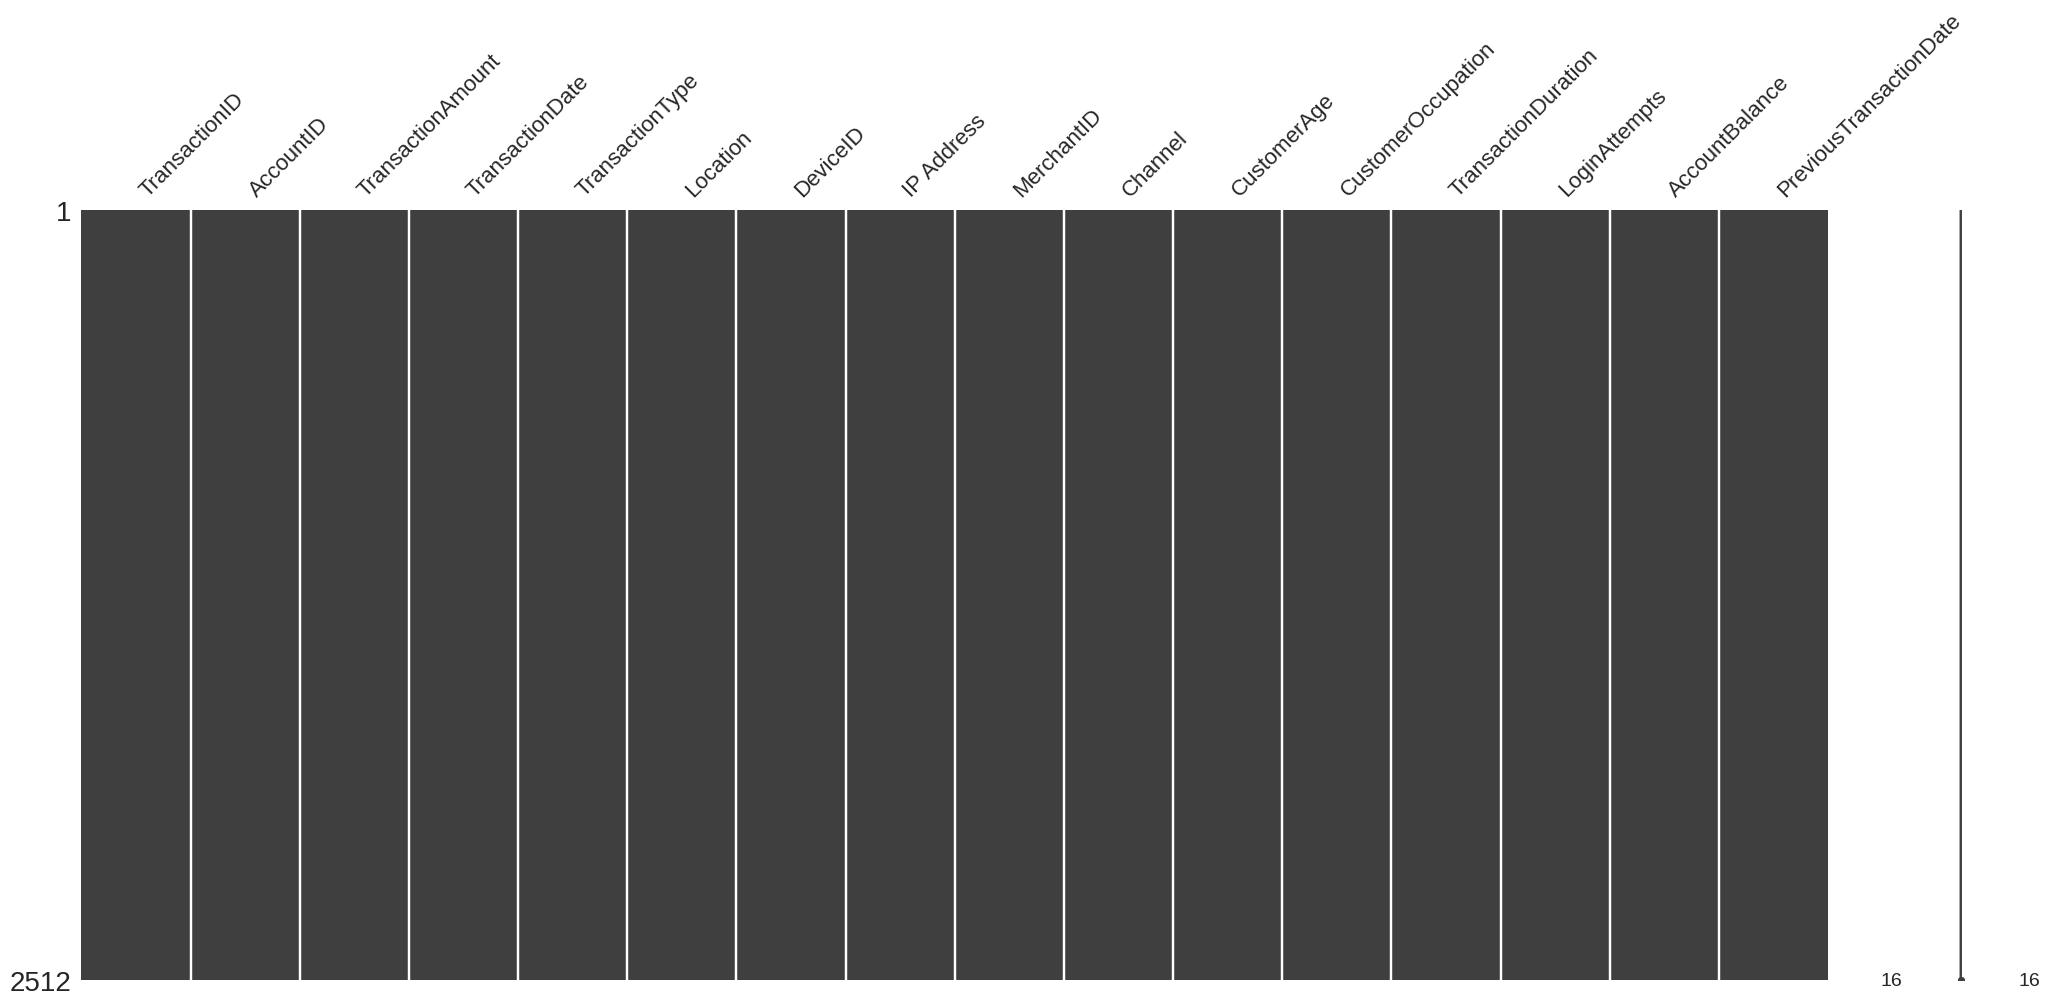

In [358]:
import missingno as msno
msno.matrix(df)

**Insight**

Dari output di atas, terlihat bahwa dataset ini tidak memiliki missing values. Oleh karena itu, dataset ini tidak perlu pananganan missing values seperti drop, imputasi, atau metode lainnya.

#### 3. Memeriksa Duplikasi Data

In [359]:
df.duplicated().sum()

np.int64(0)

**Insight**

Dapat dilihat dari output bahwa dataset ini tidak memiliki duplikasi data. Apabila terdapat duplikasi data maka harus dilakukan penanganan dengan menghapus duplikasi data.

#### 4. Memeriksa Outlier

In [360]:
# Memilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Mendeteksi outlier dengan metode IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Mendeteksi outlier dalam dataset
outliers_detected_df = detect_outliers(df, numerical_columns)

# Menghitung jumlah outlier per kolom
outlier_counts_df = {col: len(outliers_detected_df[col]) for col in outliers_detected_df}

# Menampilkan jumlah outlier per kolom
print(outlier_counts_df)

{'TransactionAmount': 113, 'CustomerAge': 0, 'TransactionDuration': 0, 'LoginAttempts': 122, 'AccountBalance': 0}


**Insight**

Outlier dalam dataset ini tidak dihapus atau ditangani karena keberadaannya dapat menjadi indikator penting dalam mendeteksi transaksi fraud. Dalam mendeteksi fraud, nilai-nilai ekstrem sering kali mencerminkan aktivitas mencurigakan yang berbeda dari pola transaksi normal.

#### 4. Analisis Distribusi dan Korelasi

##### Diagram Batang Variabel Kategorik

<ipython-input-361-3083f00d8a40>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-361-3083f00d8a40>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-361-3083f00d8a40>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


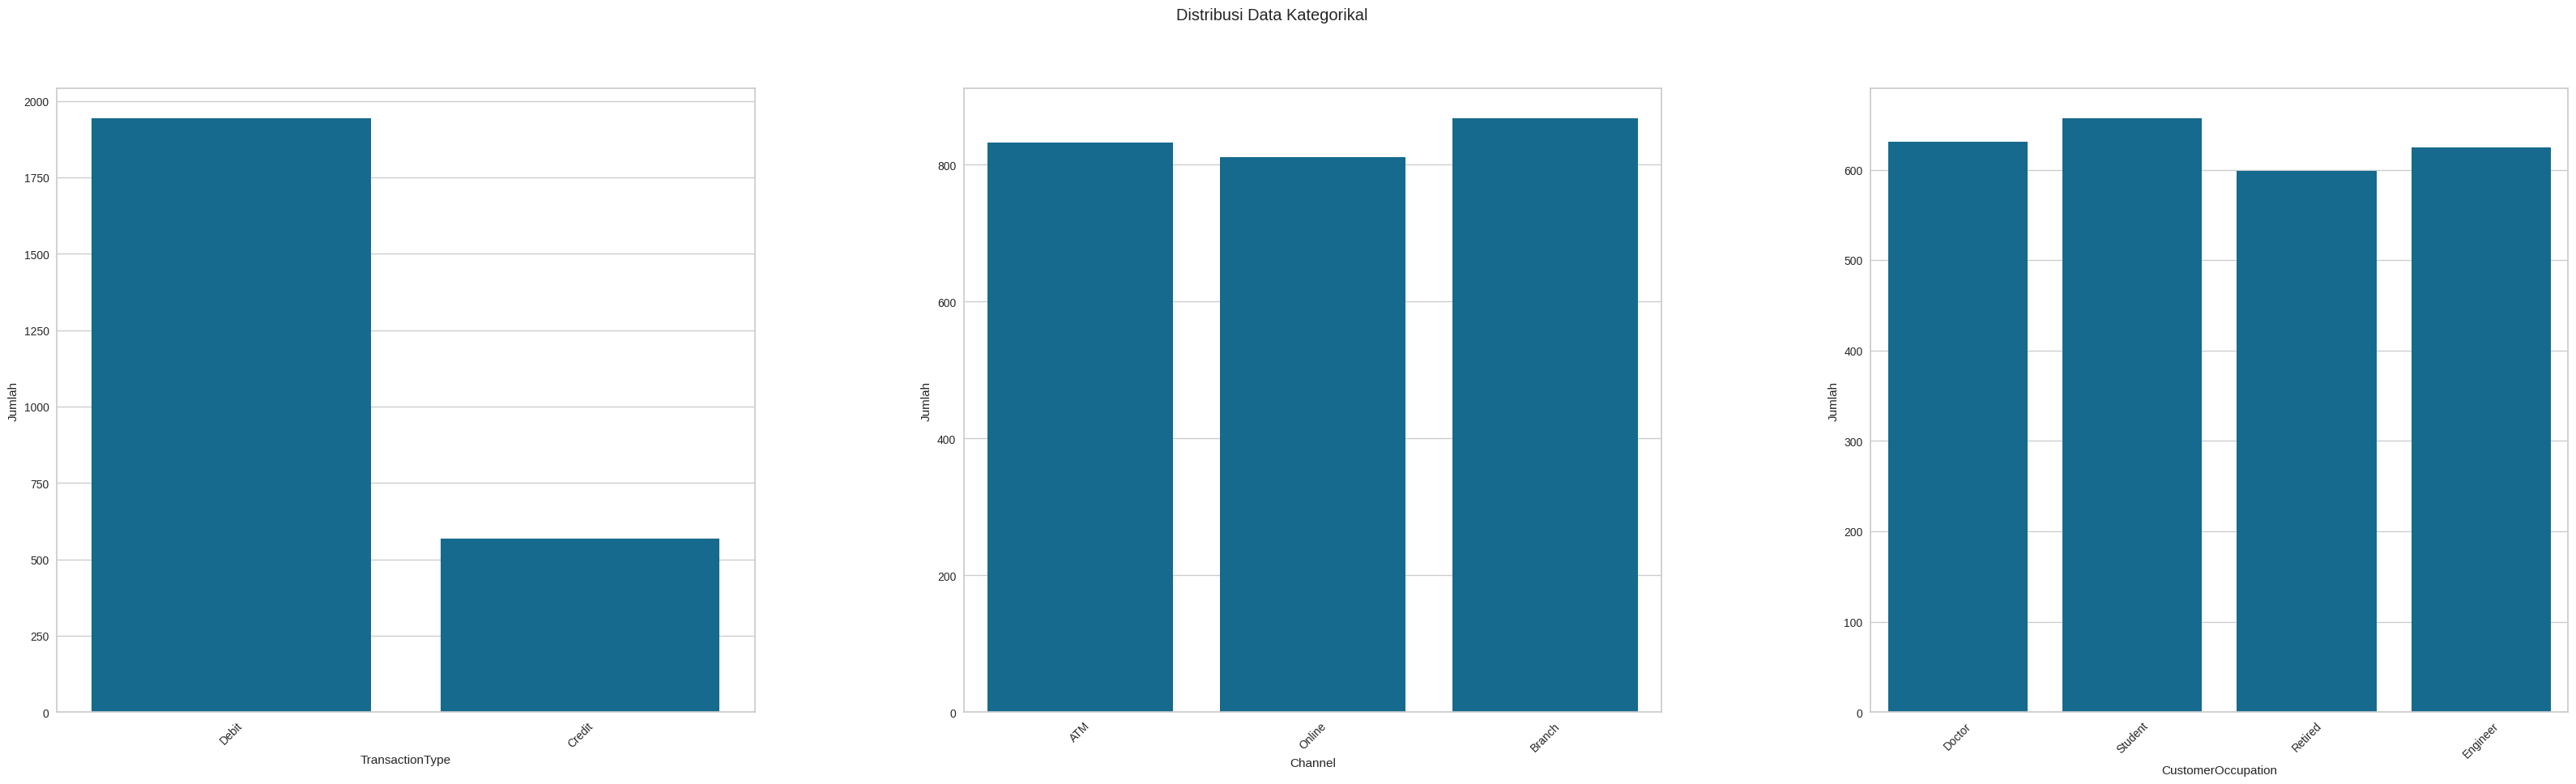

In [361]:
# Daftar variabel kategorikal yang akan diplot
categorical_features = ["TransactionType", "Channel", "CustomerOccupation"]

# Buat subplots
fig, axes = plt.subplots(1,3, figsize=(40, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Distribusi Data Kategorikal')

# Loop untuk membuat countplot setiap variabel
for ax, col in zip(axes.flat, categorical_features):
    sns.countplot(x=col, data=df, ax=ax, dodge=False)
    ax.set_ylabel("Jumlah")
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Tampilkan plot
plt.show()


**Insight**

1. Mayoritas transaksi adalah debit, yang mungkin menunjukkan kebiasaan belanja atau pembayaran dari akun pelanggan.

2. Tidak ada perbedaan signifikan dalam penggunaan channel transaksi.

3. Mahasiswa merupakan kelompok yang paling sering bertransaksi.

##### Histogram Variabel Numerik

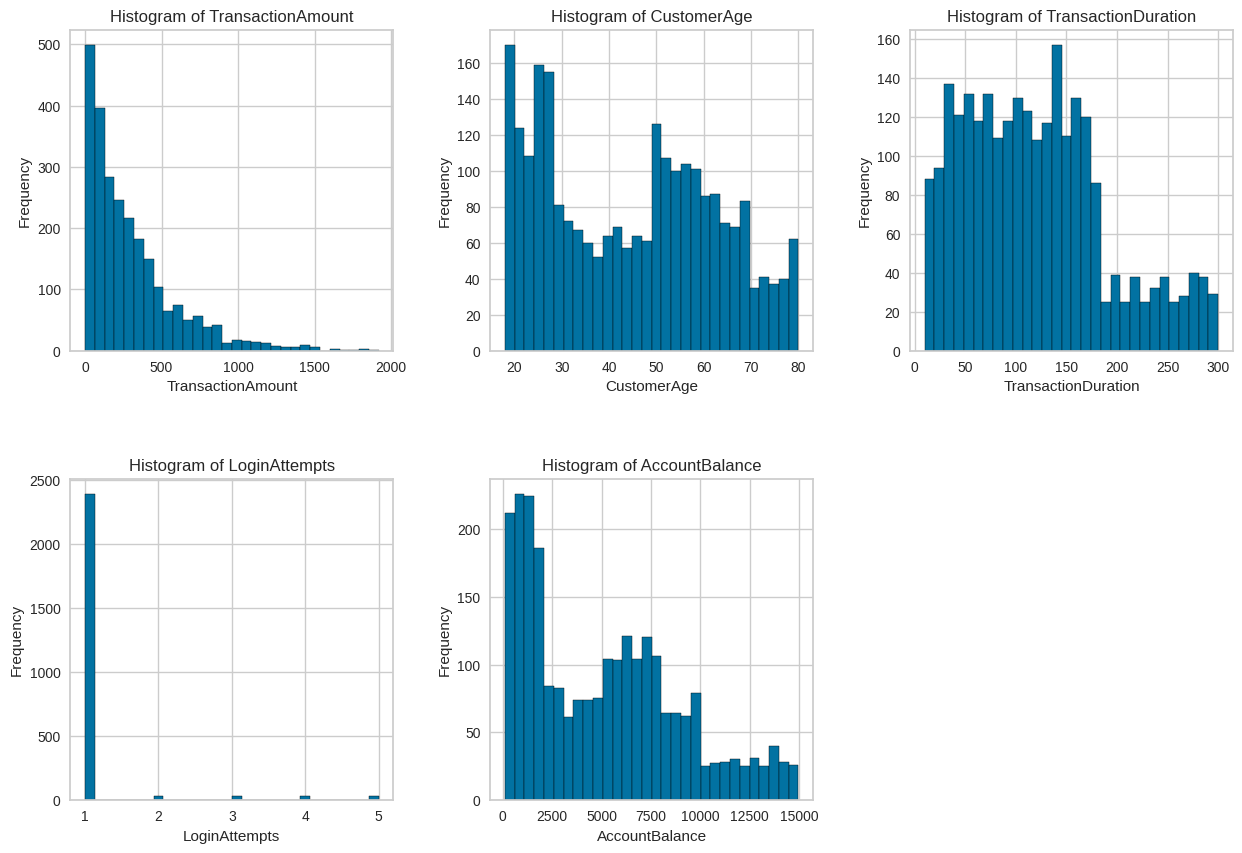

In [362]:
# Daftar variabel numerik
numerical_columns = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

# Buat subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot histogram untuk setiap variabel numerik
for ax, col in zip(axes.flat, numerical_columns):
    ax.hist(df[col], bins=30, edgecolor="black")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {col}")
    6

for i in range(len(numerical_columns), len(axes.flat)):
    fig.delaxes(axes.flat[i])

# Tampilkan plot
plt.show()


**Insight**

Berdasarkan histogram yang ditampilkan dalam gambar:

1. **TransactionAmount**  
    Distribusi sangat condong ke kanan (skewed right), menunjukkan bahwa sebagian besar transaksi memiliki jumlah kecil, sementara beberapa transaksi memiliki jumlah yang jauh lebih besar.

2. **CustomerAge**  
   Distribusi usia pelanggan relatif bervariasi, dengan beberapa puncak pada kelompok usia tertentu.

3. **TransactionDuration**  
   Distribusi relatif merata dengan sedikit kemiringan ke kanan.

4. **LoginAttempts**  
   Distribusi sangat tidak merata, dengan mayoritas pengguna melakukan hanya 1 kali percobaan login.

5. **AccountBalance**  
   Distribusi condong ke kanan, dengan sebagian besar saldo berada dalam kisaran rendah hingga menengah.


In [363]:
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.00,2512,2512,2512,2512,2512,2512,2512,2512.00,2512,2512.00,2512.00,2512.00,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.67,NaN,119.64,1.12,5114.30,NaN
std,NaN,NaN,291.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.79,NaN,69.96,0.60,3900.94,NaN
min,NaN,NaN,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,10.00,1.00,101.25,NaN
25%,NaN,NaN,81.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00,NaN,63.00,1.00,1504.37,NaN
50%,NaN,NaN,211.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.00,NaN,112.50,1.00,4735.51,NaN
75%,NaN,NaN,414.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.00,NaN,161.00,1.00,7678.82,NaN


##### Boxplot

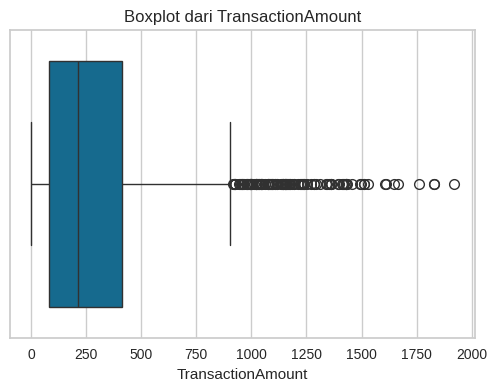

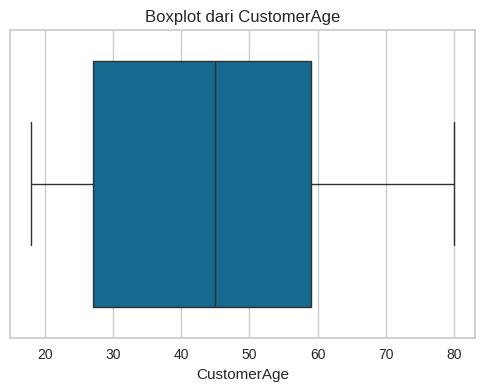

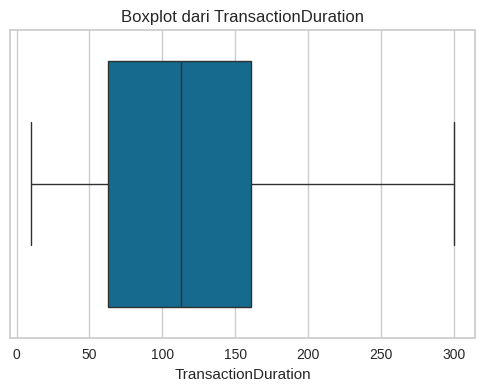

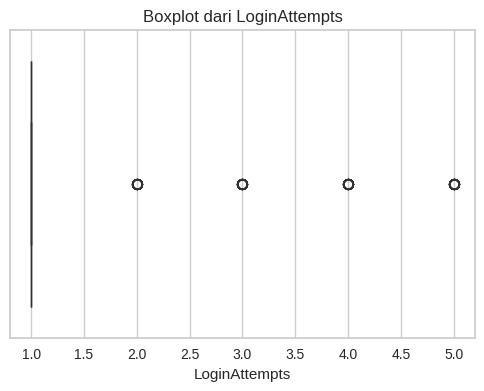

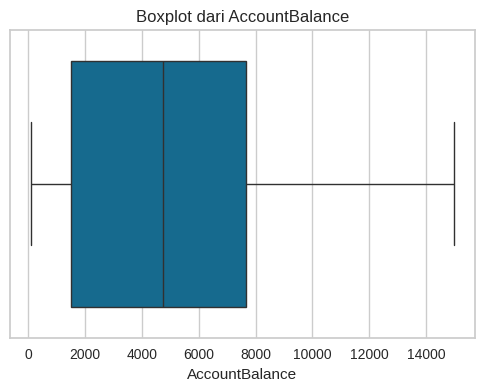

In [364]:
# Boxplot untuk memvisualisasikan distribusi data numerik dan mengidentifikasi outlier, sebaran, serta tendensi sentral
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot dari {col}")
    plt.show()


##### Pairplot

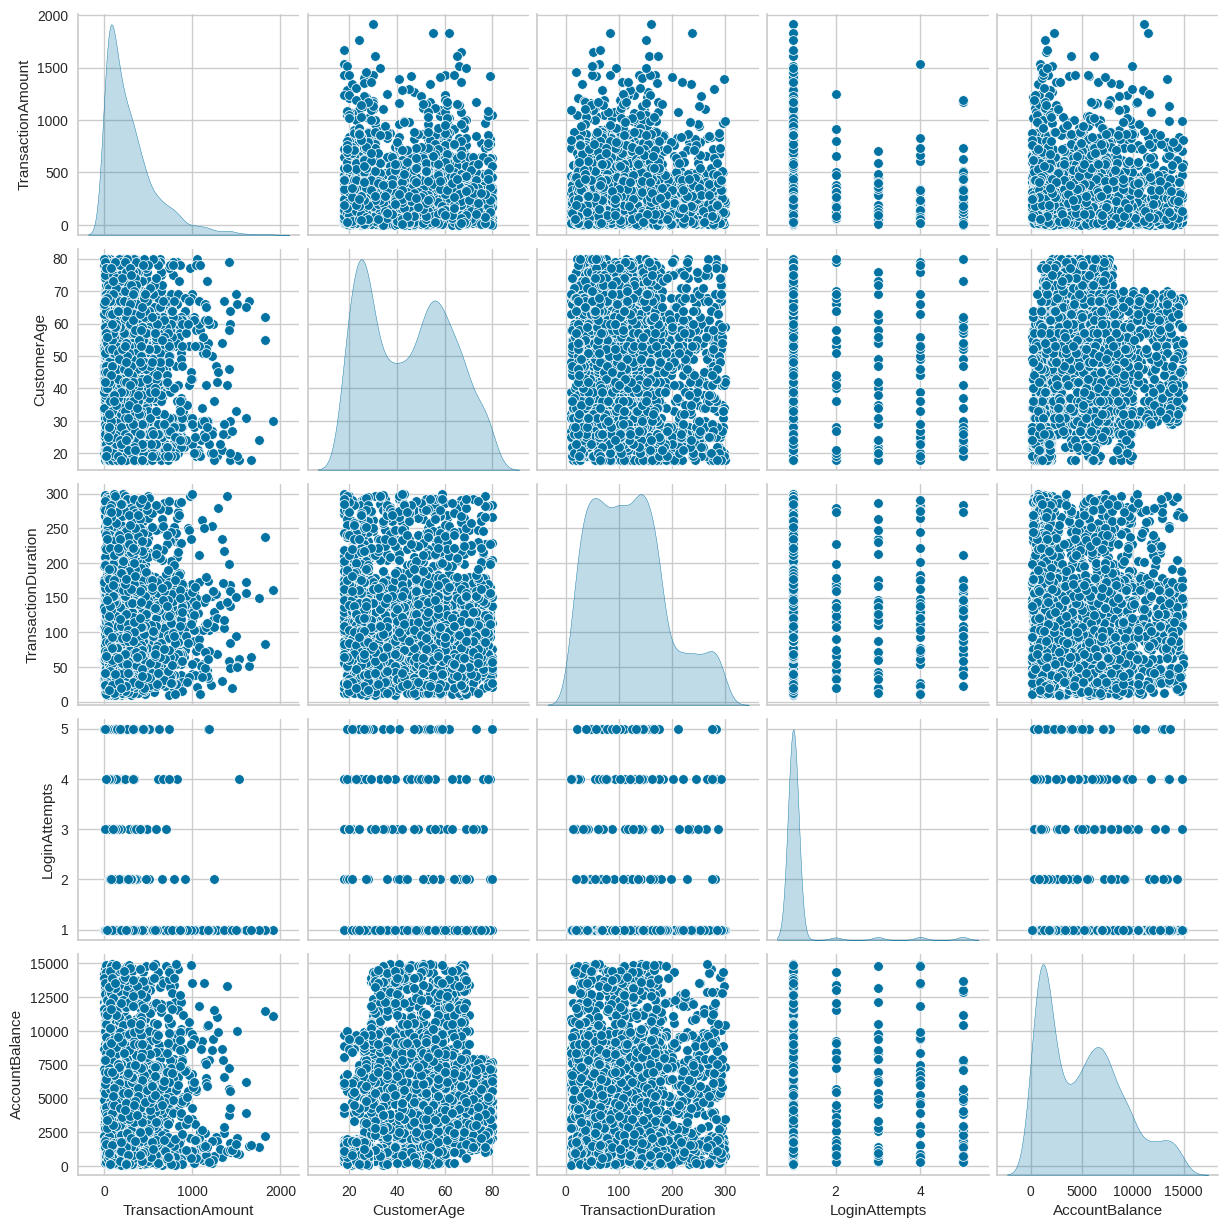

In [365]:
# Membuat Pairplot
sns.pairplot(df[["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]], diag_kind="kde")
plt.show()


**Insight**

1. **Distribusi Variabel**
    
    **TransactionAmount**: Distribusi sangat condong ke kanan, menunjukkan sebagian besar transaksi memiliki jumlah kecil, tetapi ada beberapa transaksi dengan jumlah yang sangat besar.
    
    **CustomerAge**: Memiliki distribusi bimodal, yang berarti ada dua kelompok umur yang dominan dalam dataset.
    
    **TransactionDuration**: Distribusinya cukup merata dengan beberapa puncak, menunjukkan variasi durasi transaksi yang cukup luas.
    
    **LoginAttempts**: Mayoritas pengguna melakukan 1 kali percobaan login, tetapi ada sejumlah kecil pengguna yang mencoba login beberapa kali.
    
    **AccountBalance**: Distribusi miring ke kanan, menunjukkan sebagian besar saldo berada dalam kisaran rendah hingga menengah, tetapi ada beberapa akun dengan saldo yang sangat tinggi.

2. **Hubungan Antar Variabel (Scatterplot)**
   
   **TransactionAmount vs AccountBalance**: Tidak ada pola yang jelas, tetapi terlihat beberapa titik dengan jumlah transaksi besar yang cenderung dilakukan oleh akun dengan saldo tinggi.
   
   **CustomerAge vs TransactionAmount**: Tidak ada korelasi yang kuat, transaksi dengan jumlah besar terjadi di berbagai kelompok umur.
   
   **LoginAttempts vs Variabel Lain**: Nilai LoginAttempts bersifat diskrit (integer 1-5) dan tidak menunjukkan hubungan linear dengan variabel lain, tetapi banyak percobaan login bisa menjadi indikator potensi fraud.
   
   **TransactionDuration vs TransactionAmount**: Tidak menunjukkan pola yang jelas, yang berarti durasi transaksi tidak secara langsung berhubungan dengan jumlah transaksi.


#####Correlation Heatmap

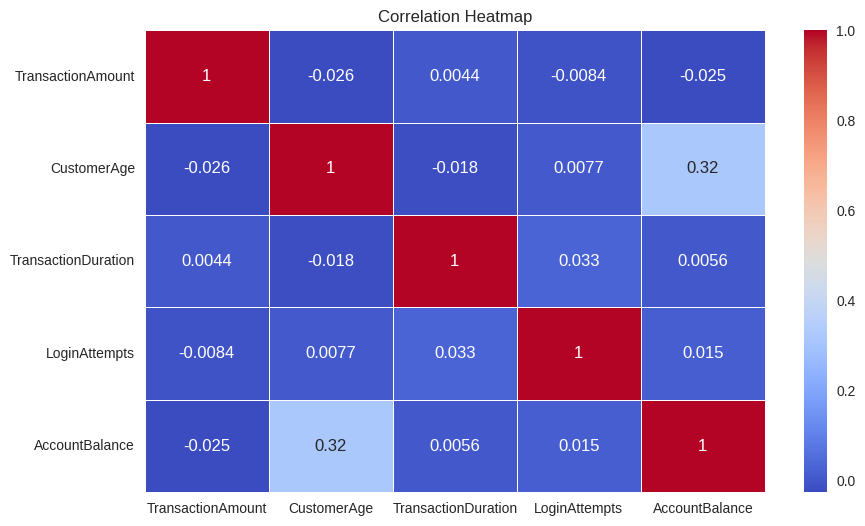

In [366]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Insight**

1. **CustomerAge & AccountBalance (0.32)**
   -  Hubungan positif, artinya semakin tua pelanggan, semakin tinggi saldo akunnya.
   - Korelasinya sedang, tidak terlalu kuat.

2. **TransactionAmount & Variabel Lain (-0.026, 0.0044, -0.0084, -0.025)**
   - Tidak ada hubungan signifikan antara TransactionAmount dengan CustomerAge, durasi transaksi, jumlah percobaan login, atau saldo akun.

3. **TransactionDuration & Variabel Lain (-0.018, 0.0044, 0.033, 0.0056)**
   - TransactionDuration tidak berhubungan signifikan dengan variabel lain.

4. **LoginAttempts & Variabel Lain (0.0077, 0.033, 0.015)**
    - Jumlah percobaan login tidak memiliki korelasi kuat dengan variabel lain.

### 5. Visualisasi Data

##### Jumlah TransactionType berdasarkan Channel

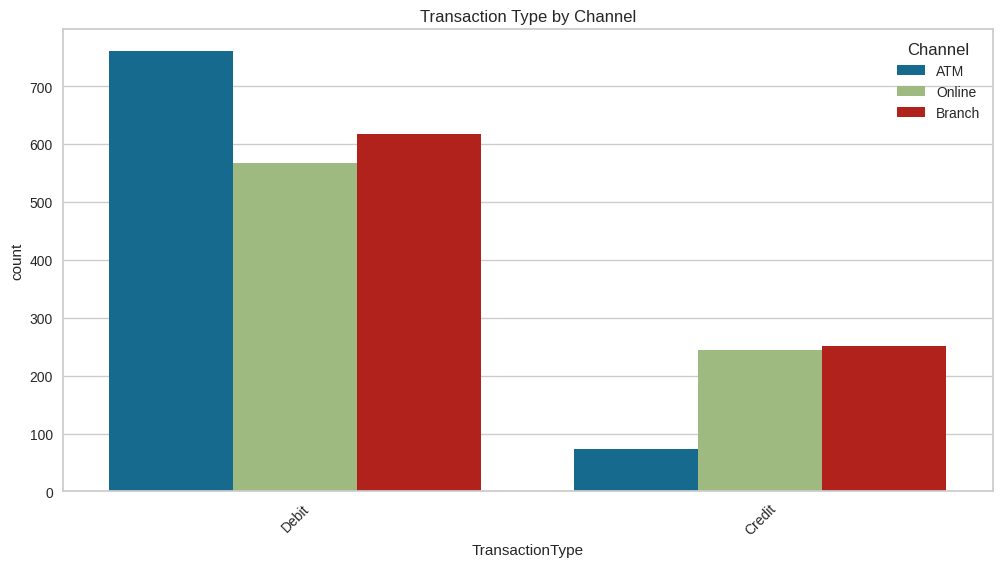

In [367]:
plt.figure(figsize=(12, 6))
sns.countplot(x="TransactionType", hue="Channel", data=df)
plt.xticks(rotation=45)
plt.title("Transaction Type by Channel")
plt.show()



##### Jumlah LoginAttempts berdasarkan Channel

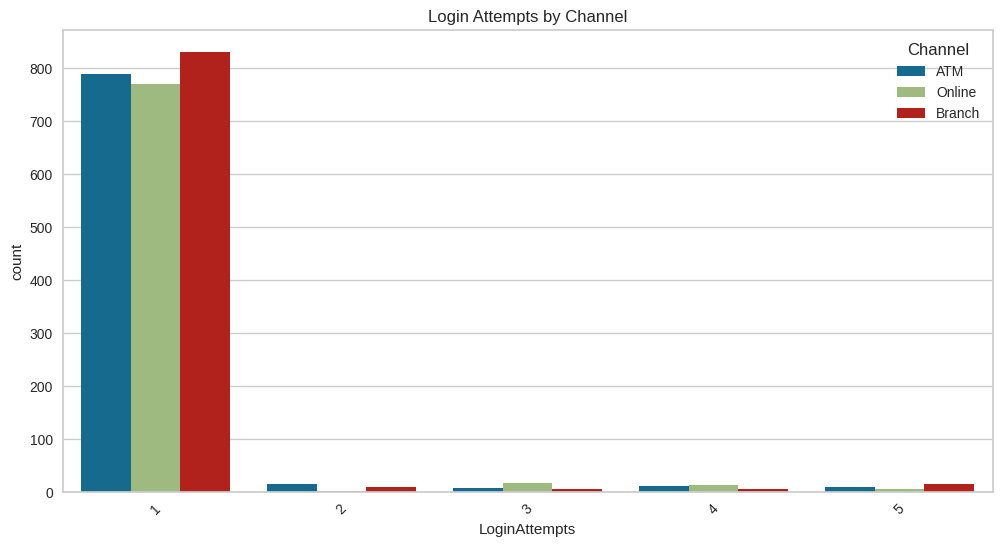

In [368]:
plt.figure(figsize=(12, 6))
sns.countplot(x="LoginAttempts", hue="Channel", data=df)
plt.xticks(rotation=45)
plt.title("Login Attempts by Channel")
plt.show()

##### Jumlah TransactionType berdasarkan CustomerOccupation

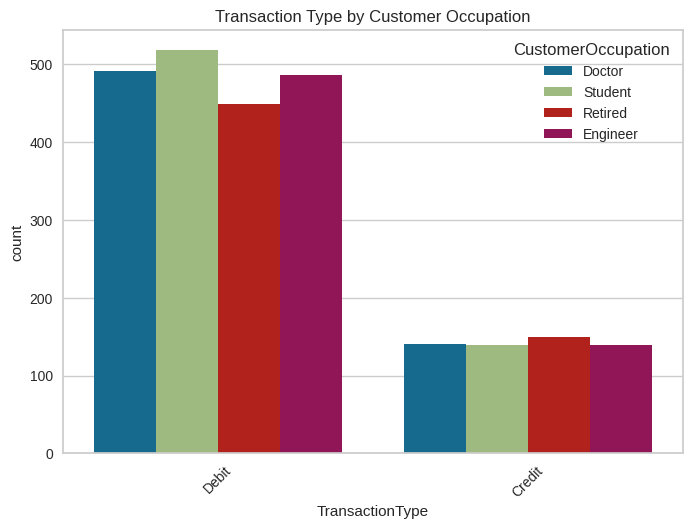

In [369]:
sns.countplot(x="TransactionType", hue="CustomerOccupation", data=df)
plt.xticks(rotation=45)
plt.title("Transaction Type by Customer Occupation")
plt.show()

##### Jumlah CustomerOccupation berdasarkan TransactionType


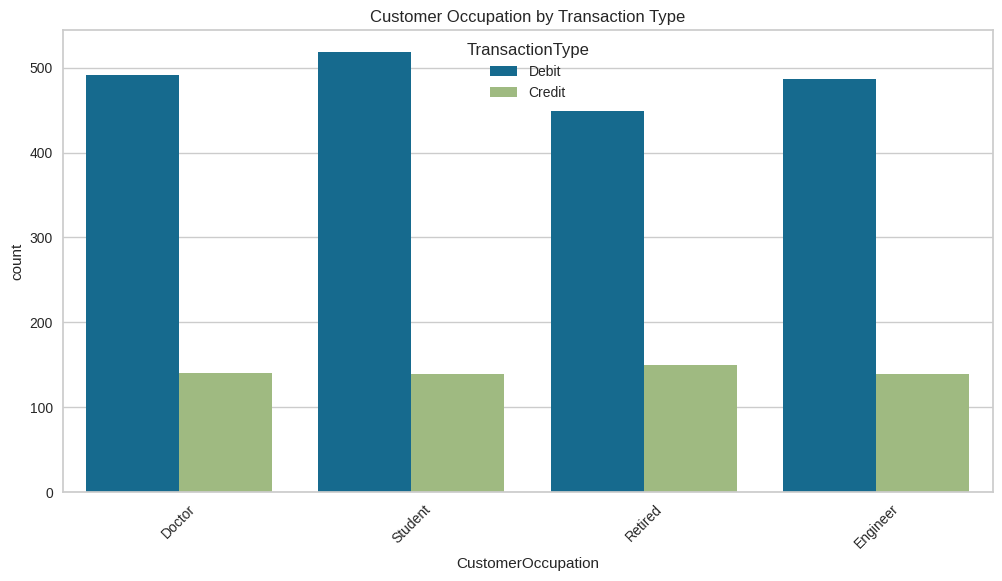

In [370]:
plt.figure(figsize=(12, 6))
sns.countplot(x="CustomerOccupation", hue="TransactionType", data=df)
plt.xticks(rotation=45)
plt.title("Customer Occupation by Transaction Type")
plt.show()

##### Jumlah CustomerOccupation berdasarkan Channel

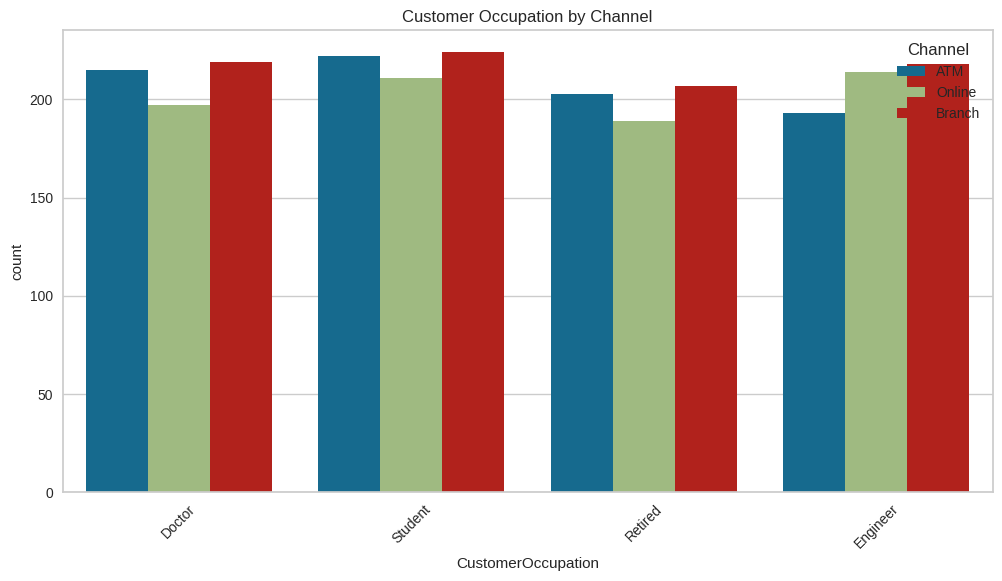

In [371]:
plt.figure(figsize=(12, 6))
sns.countplot(x="CustomerOccupation", hue="Channel", data=df)
plt.xticks(rotation=45)
plt.title("Customer Occupation by Channel")
plt.show()

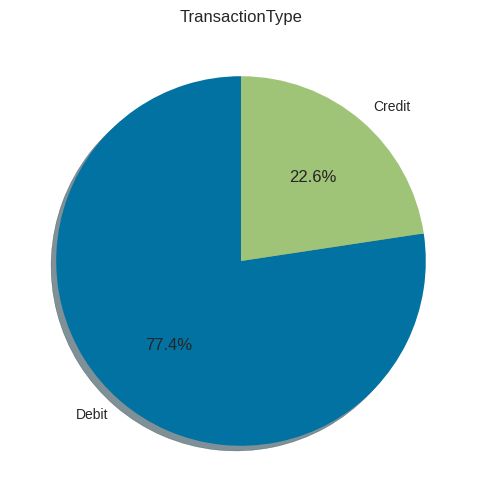

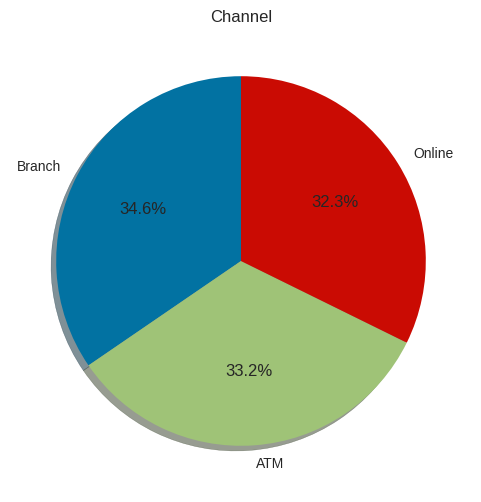

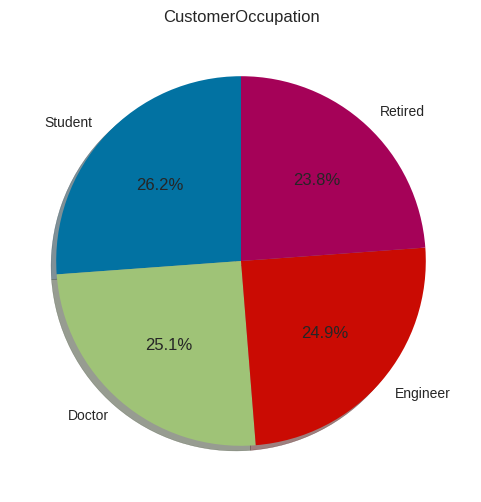

In [372]:
# List kolom kategorikal yang ingin divisualisasikan
categorical_columns = ["TransactionType", "Channel", "CustomerOccupation"]

# Loop untuk membuat pie chart setiap kategori
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title(f"{column}")
    plt.ylabel('')
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Menghapus kolom yang tidak digunakan

In [373]:
columns_to_drop = ["TransactionID", "AccountID", "MerchantID", "DeviceID", "IP Address", "TransactionDate", "PreviousTransactionDate"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)


### Standardisasi Data dengan Min-max

In [374]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Standarisasi hanya pada kolom numerik
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.01,Debit,San Diego,ATM,0.84,Doctor,0.24,0.00,0.34
1,0.20,Debit,Houston,ATM,0.81,Doctor,0.45,0.00,0.92
2,0.07,Debit,Mesa,Online,0.02,Student,0.16,0.00,0.07
3,0.10,Debit,Raleigh,Online,0.13,Student,0.05,0.00,0.57
4,0.01,Credit,Atlanta,Online,0.13,Student,0.65,0.00,0.49
...,...,...,...,...,...,...,...,...,...
2507,0.45,Credit,Colorado Springs,Branch,0.24,Doctor,0.34,0.00,0.85
2508,0.13,Debit,Tucson,Branch,0.48,Doctor,0.58,0.00,0.01
2509,0.01,Debit,San Diego,Branch,0.61,Retired,0.47,0.00,0.22
2510,0.10,Debit,Denver,Online,0.08,Student,0.03,0.00,0.11


### Menerapan Label Encoding untuk Data Kategorikal

In [375]:
categorical_cols = ["TransactionType", "Channel", "CustomerOccupation", "Location"]
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

### Menyalin dataset untuk membuat dataset yang sudah dibersihkan

In [376]:
clustering_df = df.copy()
clustering_df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.01,1,36,0,0.84,0,0.24,0.00,0.34
1,0.20,1,15,0,0.81,0,0.45,0.00,0.92
2,0.07,1,23,2,0.02,3,0.16,0.00,0.07
3,0.10,1,33,2,0.13,3,0.05,0.00,0.57
4,0.01,0,1,2,0.13,3,0.65,0.00,0.49
...,...,...,...,...,...,...,...,...,...
2507,0.45,0,7,1,0.24,0,0.34,0.00,0.85
2508,0.13,1,40,1,0.48,0,0.58,0.00,0.01
2509,0.01,1,36,1,0.61,2,0.47,0.00,0.22
2510,0.10,1,10,2,0.08,3,0.03,0.00,0.11


In [377]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Location             2512 non-null   int64  
 3   Channel              2512 non-null   int64  
 4   CustomerAge          2512 non-null   float64
 5   CustomerOccupation   2512 non-null   int64  
 6   TransactionDuration  2512 non-null   float64
 7   LoginAttempts        2512 non-null   float64
 8   AccountBalance       2512 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 176.8 KB


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### K- Means

In [378]:
# Menggunakan dataset 'clustering_df' dengan fitur yang telah dipilih
features_kmeans = ['TransactionType', 'Channel', 'TransactionAmount', 'LoginAttempts', 'AccountBalance', 'TransactionDuration']

# Membuat DataFrame baru hanya dengan fitur yang dipilih
clustering_df_kmeans = clustering_df[features_kmeans]

# Inisialisasi dan pelatihan model KMeans dengan memilih jumlah cluster = 4
kmeans_model = KMeans(n_clusters=4, random_state=0)
kmeans_model.fit(clustering_df_kmeans)

kmeans_model


KMeans(n_clusters=4, random_state=0)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [379]:
silhouette_avg = silhouette_score(clustering_df_kmeans, kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.45652492980177356


**Insight**

Memeriksa hasil clustering dengan trial tanpa menggunakan metode optimasi cluster dihasilkan model K-Means dengan 4 cluster dan Silhouette Score 0.4565 cukup baik dalam clustering dataset.

#### Elbow Method

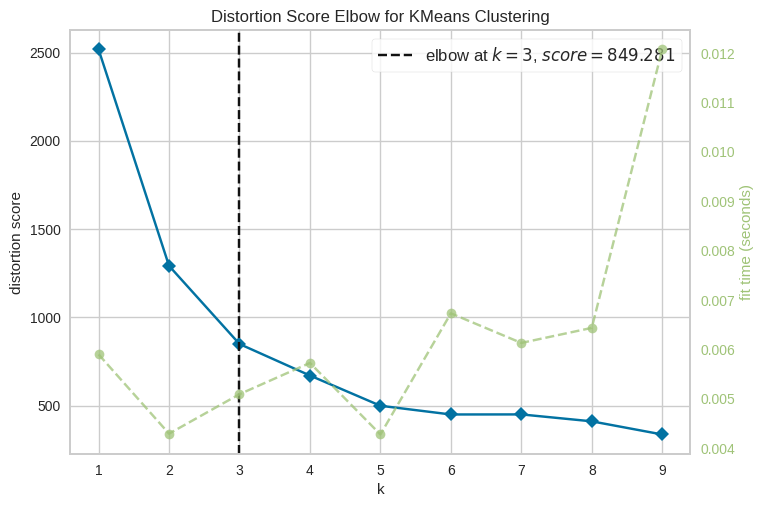

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [380]:
# Inisialisasi model KMeans
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(clustering_df_kmeans)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [381]:
# Menggunakan dataset 'clustering_df' dengan fitur yang telah dipilih
features_kmeans = ['TransactionType', 'Channel', 'TransactionAmount', 'LoginAttempts', 'AccountBalance', 'TransactionDuration']

# Membuat DataFrame baru hanya dengan fitur yang dipilih
clustering_df_kmeans = clustering_df[features_kmeans]

# Inisialisasi dan pelatihan model KMeans dengan memilih jumlah cluster = 3
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(clustering_df_kmeans)

kmeans_model


KMeans(n_clusters=3, random_state=0)

In [382]:
silhouette_avg = silhouette_score(clustering_df_kmeans, kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4324368500430053


**Insight**

Memeriksa hasil clustering dengan menggunakan elbow method dihasilkan model K-Means dengan 3 cluster optimal dan Silhouette Score 0.4324 cukup baik dalam clustering dataset. Akan tetapi, hasil dengan cluster n = 4 mendapatkan hasil yang lebih tinggi yaitu 0.4565 sehingga akan digunakan cluster n =4

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

####Memilih Fitur yang Akan Digunakan untuk Clustering



In [383]:
# Menggunakan dataset 'clustering_df' dengan fitur yang telah dipilih
features_kmeans = ['TransactionType', 'Channel', 'TransactionAmount', 'LoginAttempts', 'AccountBalance', 'TransactionDuration']

# Membuat DataFrame baru hanya dengan fitur yang dipilih
clustering_df_selected = clustering_df[features_kmeans]

print("Selected Features:", features_kmeans)


Selected Features: ['TransactionType', 'Channel', 'TransactionAmount', 'LoginAttempts', 'AccountBalance', 'TransactionDuration']


####  Melakukan Reduksi Dimensi dengan PCA

In [384]:
# PCA untuk reduksi dimensi sebelum clustering
pca = PCA(n_components=2)
clustering_df_pca = pca.fit_transform(clustering_df_selected)

# Konversi hasil PCA ke DataFrame
clustering_df_pca = pd.DataFrame(clustering_df_pca, columns=['PC1', 'PC2'])

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.66302807 0.1646651 ]


#### Menjalankan K-Means Setelah PCA

In [385]:
# Inisialisasi KMeans setelah PCA
kmeans_pca = KMeans(n_clusters=4, random_state=0)
kmeans_pca.fit(clustering_df_pca)


KMeans(n_clusters=4, random_state=0)

####Evaluasi Model dengan Silhouette Score

In [386]:
# Menampilkan Silhouette Score setelah PCA
silhouette_avg_pca = silhouette_score(clustering_df_pca, kmeans_pca.labels_)
print(f"Silhouette Score (after PCA): {silhouette_avg_pca}")


Silhouette Score (after PCA): 0.8508213681054558


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

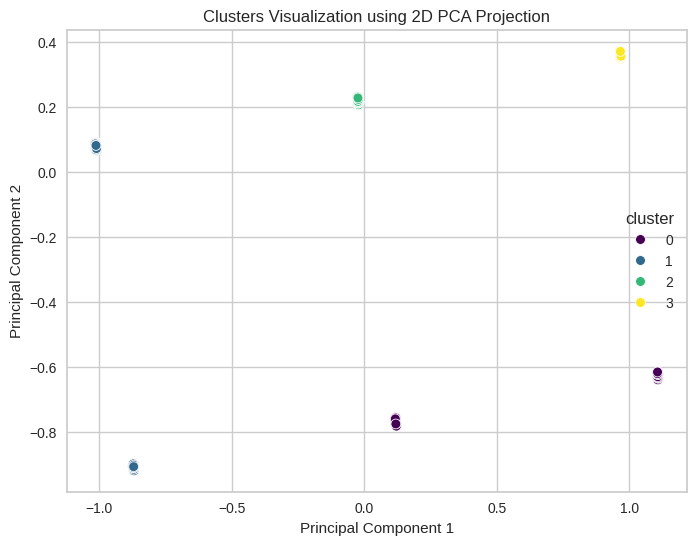

In [387]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_df_pca)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans_pca.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Clusters Visualization using 2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [388]:
result_df = df.copy()
result_df['cluster'] = kmeans_pca.labels_
result_df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,cluster
0,0.01,1,36,0,0.84,0,0.24,0.00,0.34,1
1,0.20,1,15,0,0.81,0,0.45,0.00,0.92,1
2,0.07,1,23,2,0.02,3,0.16,0.00,0.07,3
3,0.10,1,33,2,0.13,3,0.05,0.00,0.57,3
4,0.01,0,1,2,0.13,3,0.65,0.00,0.49,0
...,...,...,...,...,...,...,...,...,...,...
2507,0.45,0,7,1,0.24,0,0.34,0.00,0.85,0
2508,0.13,1,40,1,0.48,0,0.58,0.00,0.01,2
2509,0.01,1,36,1,0.61,2,0.47,0.00,0.22,2
2510,0.10,1,10,2,0.08,3,0.03,0.00,0.11,3


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [389]:
# Mengembalikan data numerik ke skala aslinya
result_df[numerical_columns] = scaler.inverse_transform(result_df[numerical_columns])


In [391]:
for col in categorical_cols:
    result_df[col] = encoders[col].inverse_transform(df[col])




In [394]:
df_cluster = result_df[['TransactionAmount', 'CustomerAge', 'TransactionDuration','AccountBalance', 'LoginAttempts' ,'cluster']].groupby('cluster').mean().T
df_cluster

cluster,0,1,2,3
TransactionAmount,305.20,307.72,276.63,298.90
CustomerAge,46.51,44.96,43.93,43.46
TransactionDuration,118.83,122.09,116.81,119.84
AccountBalance,5355.39,5030.52,5276.83,4850.07
LoginAttempts,1.15,1.12,1.11,1.12


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### Statistik Deskriptif

In [395]:
# Mengatur tampilan
pd.set_option('display.float_format', '{:.2f}'.format)

# Menghitung statistik deskriptif untuk fitur numerik berdasarkan cluster
cluster_statistics = result_df.groupby('cluster')[["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]].describe()

# Transposisi
cluster_statistics = cluster_statistics.T

# Menampilkan tabel statistik deskriptif
print(cluster_statistics)


cluster                          0        1        2        3
TransactionAmount   count   495.00   833.00   617.00   567.00
                    mean    305.20   307.72   276.63   298.90
                    std     290.47   303.51   278.98   289.29
                    min       3.30     0.32     0.45     0.26
                    25%      79.23    84.89    77.53    93.18
                    50%     220.68   218.96   186.55   207.65
                    75%     425.18   427.69   383.37   407.23
                    max    1831.02  1919.11  1664.33  1830.00
CustomerAge         count   495.00   833.00   617.00   567.00
                    mean     46.51    44.96    43.93    43.46
                    std      17.81    17.80    17.69    17.77
                    min      18.00    18.00    18.00    18.00
                    25%      28.00    27.00    27.00    27.00
                    50%      49.00    46.00    43.00    41.00
                    75%      60.00    60.00    58.00    58.00
        

### Pie Chart Kategorikal

In [404]:
clus_0 = result_df[result_df['cluster']==0]
clus_1 = result_df[result_df['cluster']==1]
clus_2 = result_df[result_df['cluster']==2]
clus_3 = result_df[result_df['cluster']==3]

In [406]:
def pie_chart(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts()
    axes.pie(cnts, labels=cnts.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
    axes.set_title( s.upper(), fontsize=14, fontweight='bold')

def bar_plt(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts().head(5)
    bars = axes.bar(cnts.index, cnts.values)
    axes.bar_label(bars)
    axes.set_title(s.upper(), fontsize=14, fontweight='bold')
    axes.get_yaxis().set_visible(False)
    axes.set_xlabel(col)

#### Customer Occupation

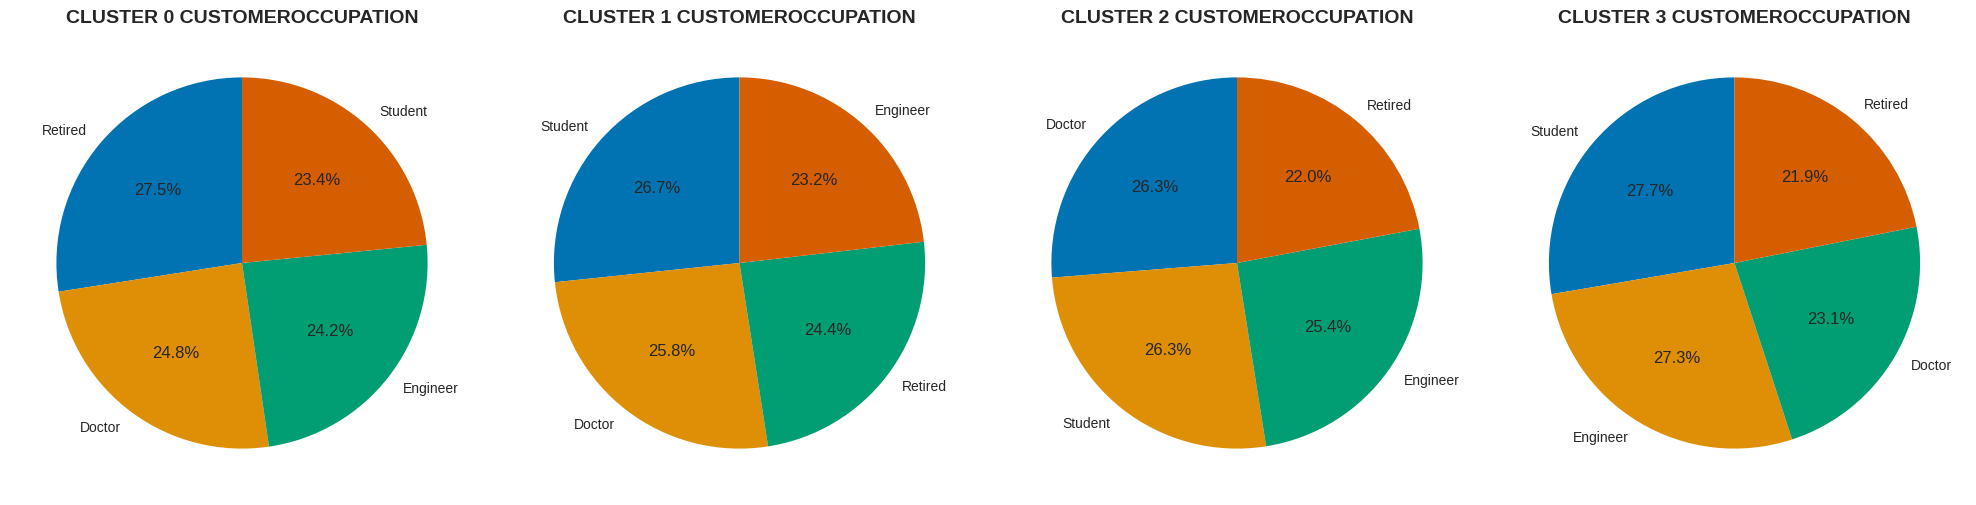

In [407]:
# Membuat subplot untuk tiap cluster
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Menampilkan pie chart untuk masing-masing cluster
pie_chart(clus_0, 'CustomerOccupation', axes[0], 'Cluster 0')
pie_chart(clus_1, 'CustomerOccupation', axes[1], 'Cluster 1')
pie_chart(clus_2, 'CustomerOccupation', axes[2], 'Cluster 2')
pie_chart(clus_3, 'CustomerOccupation', axes[3], 'Cluster 3')

plt.tight_layout()
plt.show()


#### Transaction Type

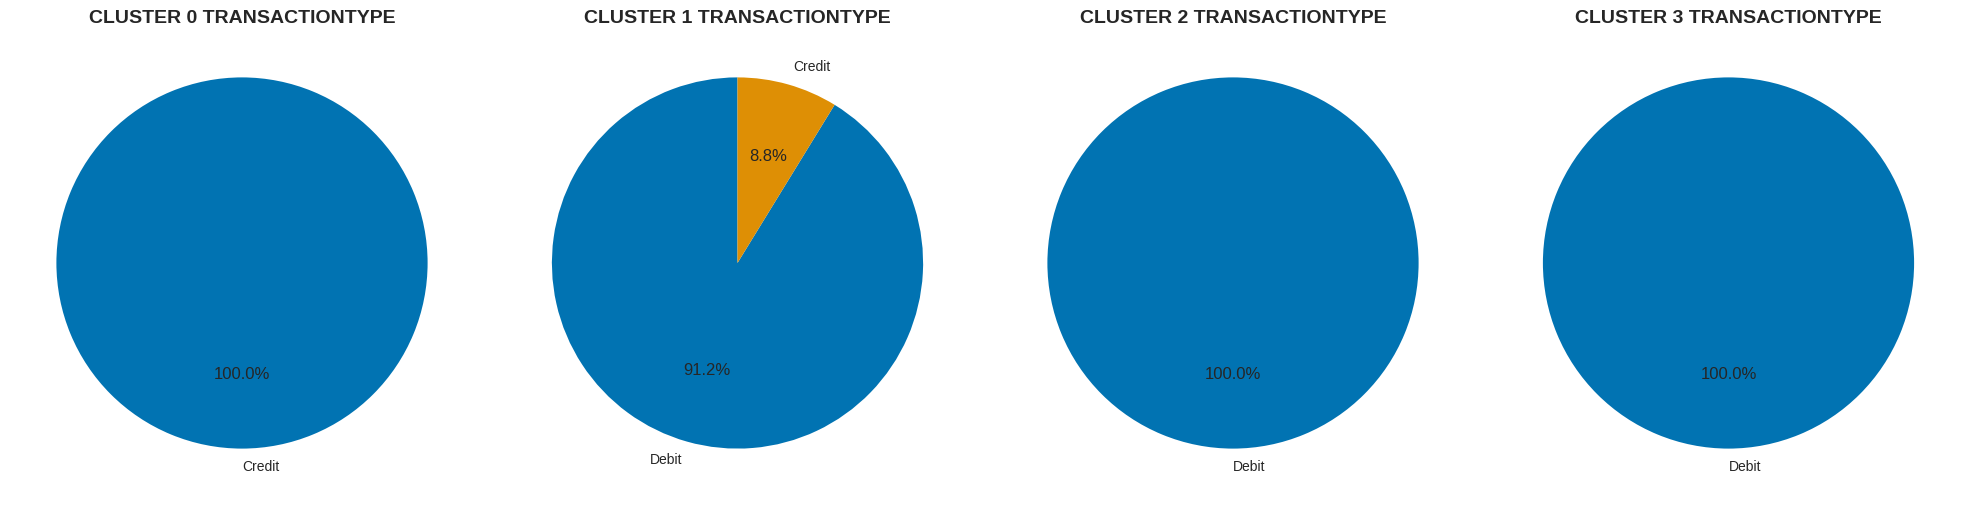

In [408]:
# Membuat subplot untuk tiap cluster
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Menampilkan pie chart untuk masing-masing cluster
pie_chart(clus_0, 'TransactionType', axes[0], 'Cluster 0')
pie_chart(clus_1, 'TransactionType', axes[1], 'Cluster 1')
pie_chart(clus_2, 'TransactionType', axes[2], 'Cluster 2')
pie_chart(clus_3, 'TransactionType', axes[3], 'Cluster 3')

plt.tight_layout()
plt.show()


#### Channel

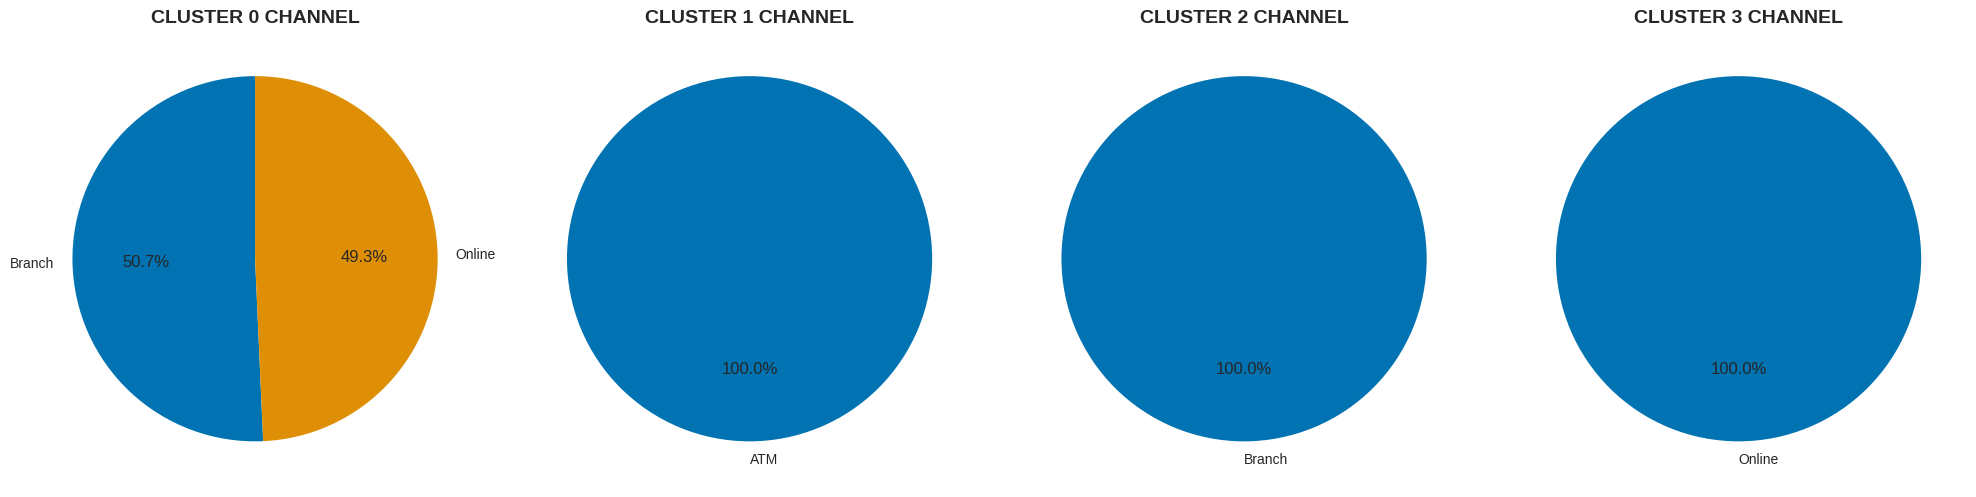

In [409]:
# Membuat subplot untuk tiap cluster
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Menampilkan pie chart untuk masing-masing cluster
pie_chart(clus_0, 'Channel', axes[0], 'Cluster 0')
pie_chart(clus_1, 'Channel', axes[1], 'Cluster 1')
pie_chart(clus_2, 'Channel', axes[2], 'Cluster 2')
pie_chart(clus_3, 'Channel', axes[3], 'Cluster 3')

plt.tight_layout()
plt.show()



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0
- Rata-rata TransactionAmount: 305.20  
- Rata-rata CustomerAge: 46.51 tahun  
- Rata-rata TransactionDuration: 118.83 detik  
- Rata-rata LoginAttempts: 1.15 kali  
- Rata-rata AccountBalance: 5,355.39  
- TransactionType: 100% transaksi dalam cluster ini adalah Credit  
- Channel: Transaksi dilakukan melalui 50.7% Branch dan 49.3% Online  
- CustomerOccupation: Didominasi oleh Retired.

### Analisis
Pelanggan dalam cluster ini memiliki saldo akun yang tinggi, nilai transaksi yang relatif besar, dan sering melakukan transaksi Credit di cabang bank atau secara online. Karakteristik ini menunjukkan pelanggan yang cenderung memiliki keterlibatan perbankan yang aktif dan lebih nyaman dengan transaksi besar yang dilakukan melalui metode yang lebih aman (cabang dan online).  

---

## Cluster 1:
- Rata-rata TransactionAmount: 307.72  
- Rata-rata CustomerAge: 44.96 tahun  
- Rata-rata TransactionDuration: 122.09 detik  
- Rata-rata LoginAttempts: 1.12 kali  
- Rata-rata AccountBalance: 5,030.52  
- TransactionType: 91,2% transaksi dalam cluster ini adalah Debit dan sisanya adalah kredit.
- Channel: 100% transaksi melalui ATM  
- CustomerOccupation: Paling banyak diduduki oleh student sebanyak 26.7%

### Analisis
Pelanggan dalam cluster ini lebih sering menggunakan Debit untuk transaksi perbankan dengan ATM sebagai metode utama. Nilai transaksi cukup tinggi, tetapi berbeda dengan Cluster 0, mayoritas transaksi dilakukan tanpa pengawasan langsung dari pihak bank yaitu ATM.

---

## Cluster 2:
- Rata-rata TransactionAmount: 276.63  
- Rata-rata CustomerAge: 43.93 tahun  
- Rata-rata TransactionDuration: 116.81 detik  
- Rata-rata LoginAttempts: 1.11 kali  
- Rata-rata AccountBalance: 5,276.83  
- TransactionType: Seluruh transaksi adalah Debit  
- Channel: Seluruh transaksi melalui Branch  
- CustomerOccupation: Mayoritas terdiri dari Doctor dan Student.

### Analisis
Cluster ini berisi pelanggan yang lebih nyaman bertransaksi di cabang bank dengan transaksi bernilai lebih kecil dibandingkan cluster lainnya. Mereka cenderung memilih layanan tatap muka, yang biasanya terkait dengan nasabah yang kurang familiar dengan layanan digital atau lebih berhati-hati terhadap keamanan finansial.  

---

## Cluster 3:
- Rata-rata TransactionAmount: 298.90  
- Rata-rata CustomerAge: 43.46 tahun  
- Rata-rata TransactionDuration: 119.84 detik  
- Rata-rata LoginAttempts: 1.12 kali  
- Rata-rata AccountBalance: 4,850.07  
- TransactionType: Hampir seluruh transaksi adalah Debit  
- Channel: Didominasi oleh transaksi Online  
- CustomerOccupation: Mayoritas terdiri dari Student dan Engineer.

### Analisis
Cluster ini lebih banyak melakukan transaksi online dengan nominal yang tidak terlalu besar. Mayoritas pelanggan di cluster ini adalah Student dan Engineer, yang biasanya lebih aktif dalam transaksi online tetapi dengan daya beli yang lebih rendah dibandingkan kelompok profesional.  

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [397]:
result_df.to_csv('result_df.csv', index=False)

In [398]:
# Simpan DataFrame ke file CSV
result_df.to_csv('result_df.csv', index=False)